In [1]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv("sample_test_out_fail.csv")
df

In [ ]:
df = pd.read_csv("sample_test_out.csv")
df

In [ ]:
df = pd.read_csv("sample_test.csv")
df

In [ ]:
df = pd.read_csv("test.csv")
df

In [ ]:
df = pd.read_csv("train.csv")
df

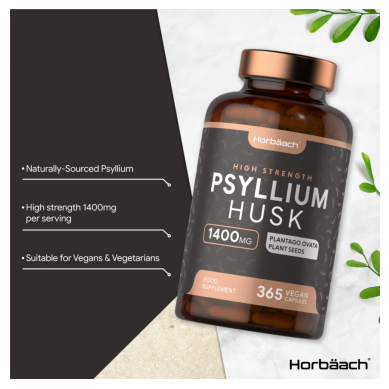

In [18]:
import cv2
import matplotlib.pyplot as plt
# Read the image
image = cv2.imread('images_with_metadata\image_5.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
from PIL import Image
from PIL.ExifTags import TAGS

# Open the image
image = Image.open('images_with_metadata\image_1.png')

# Extract EXIF data
exif_data = image._getexif()

# Check if EXIF data is available
if exif_data:
    # Loop through EXIF data and print metadata
    for tag, value in exif_data.items():
        tag_name = TAGS.get(tag, tag)
        print(f"{tag_name}: {value}")
else:
    print("No EXIF metadata found.")


In [ ]:
from PIL import Image
from PIL.PngImagePlugin import PngImageFile

# Function to read metadata from a PNG image
def read_image_metadata(filename):
    try:
        # Open the image
        img = Image.open(filename)
        
        # Check if it's a PNG image and has metadata
        if isinstance(img, PngImageFile) and img.info:
            print(f"Metadata for {filename}:")
            for key, value in img.info.items():
                print(f"{key}: {value}")
        else:
            print(f"No metadata found in {filename}")
    
    except Exception as e:
        print(f"Error reading {filename}: {e}")

# Example usage: reading metadata from one of the saved images
read_image_metadata('images_with_metadata/image_1.png')  # Update with the actual filename


In [17]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import pytesseract
import numpy as np
import cv2
from PIL import Image


pytesseract.pytesseract.tesseract_cmd = r"c:\Program Files\Tesseract-OCR\tesseract.exe"

# Step 1: Load Pre-trained EfficientNetB0 Model
def load_effnet_model():
    # Load EfficientNetB0 without the top layer
    model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    return model

# Step 2: Image Preprocessing
def preprocess_image(image_path):
    # Load image from the local file system
    img = load_img(image_path, target_size=(224, 224))  # Resize to match the model input
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)  # Preprocess for EfficientNet
    return img_array

# Step 3: Extract Image Features Using EfficientNetB0
def extract_image_features(model, image_array):
    features = model.predict(image_array)
    features = features.flatten()  # Flatten the output to 1D array
    return features

# Step 4: OCR Using Tesseract
def extract_text_from_image(image_path):
    # Load image and apply OCR
    img = np.array(Image.open(image_path))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for better OCR
    text = pytesseract.image_to_string(img_gray)  # Extract text using Tesseract
    return text

# Step 5: Combine Image Features and OCR Text
def extract_features_and_text(image_path, model):
    image_array = preprocess_image(image_path)
    image_features = extract_image_features(model, image_array)
    ocr_text = extract_text_from_image(image_path)
    return image_features, ocr_text

# Example Usage
if __name__ == "__main__":
    image_path = "images_with_metadata\image_5.png"  # Replace with your local image path
    
    # Load the EfficientNetB0 model
    effnet_model = load_effnet_model()
    
    # Extract image features and text
    image_features, ocr_text = extract_features_and_text(image_path, effnet_model)
    
    print("Extracted Image Features:", image_features)
    print("Extracted OCR Text:", ocr_text)


1/1 [==============================] - 2s 2s/step
Extracted Image Features: [-0.26059747 -0.1623796  -0.11594016 ... -0.14543653 -0.2557428
 -0.03696982]
Extracted OCR Text: HIGH 5;

PSYLL Uy

¢ Naturally-Sourced Psyllium

—_

* High strength 1400mg
per serving

rr,

PLANTA

GOO
PLANT SEEDs es

* Suitable for Vegans & Vegetarians

See |
Ble 365 a |

Horbaach



In [ ]:
ocr_text_features = np.array([len(text) for text in ocr_texts]).reshape(-1, 1)

# Step 3: Encode `entity_name` as categorical features
entity_name_encoder = LabelEncoder()
entity_name_encoded = entity_name_encoder.fit_transform(df['entity_name'])

# Step 4: Combine all features (image features, OCR features, and entity name)
X = np.hstack((image_features, ocr_text_features, entity_name_encoded.reshape(-1, 1)))

# Target variable
y = df['entity_value'].values

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a model (RandomForest in this case)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

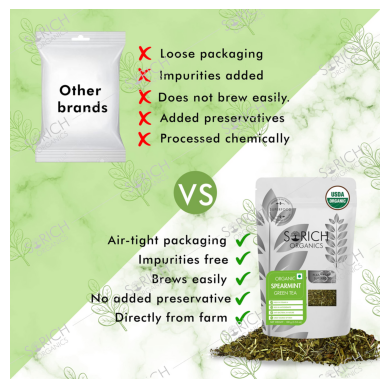

In [15]:
import cv2
import matplotlib.pyplot as plt
# Read the image
image = cv2.imread('images_with_metadata\image_15.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [13]:
from PIL import Image
from PIL.PngImagePlugin import PngImageFile

# Function to read metadata from a PNG image
def read_image_metadata(filename):
    try:
        # Open the image
        img = Image.open(filename)
        
        # Check if it's a PNG image and has metadata
        if isinstance(img, PngImageFile) and img.info:
            print(f"Metadata for {filename}:")
            for key, value in img.info.items():
                print(f"{key}: {value}")
        else:
            print(f"No metadata found in {filename}")
    
    except Exception as e:
        print(f"Error reading {filename}: {e}")

# Example usage: reading metadata from one of the saved images
read_image_metadata('images_with_metadata/image_15.png')  # Update with the actual filename

Metadata for images_with_metadata/image_15.png:
group_id: 281678
entity_name: item_weight
entity_value: 100 gram


In [7]:
import pandas as pd
df = pd.read_csv("train.csv")

In [8]:
df

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram
...,...,...,...,...
263854,https://m.media-amazon.com/images/I/612J1R1xHl...,558806,height,5.0 centimetre
263855,https://m.media-amazon.com/images/I/61Blzh2+28...,470067,height,8.5 inch
263856,https://m.media-amazon.com/images/I/51MsegDL9V...,204245,height,43.2 centimetre
263857,https://m.media-amazon.com/images/I/510KhVw4VS...,752266,height,9.1 centimetre
